# Polynomial Regression
So according to the visualizations from the <a href="https://github.com/lynstanford/machine-learning-projects/machine-learning/multiple_regression.ipynb">Linear Regression</a> notebook, the connection between the dependent and independent variables appear to be strongly linear in relationship although the connection between the 'Volume' of daily bitcoin bought and sold has less association with the daily 'Close' price. 

Fitting a Linear Regression line to the data may be accurate in this case, with an R2 value of 0.9991392014437468 and RMSE of 689.1925598643533. However, out of curiosity I decided to see if a Polynomial function could fit the line slightly better by employing a regularization technique to try and improve the bias term and decrease Mean Squared Error.

The r-squared value is used to represent the overall accuracy score and directly measures the degree of variability associated between the predictors and target variable. The root mean squared value is represented as a loss function and my aim is to reduce its overall value as much as possible using regularization.

Keeping the data loading simple this time will reduce the overall time it takes to retrieve.

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import data
bitcoin = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")
df = pd.DataFrame(bitcoin).dropna(axis=0)

Establishing the features contained within this dataset with empty rows already removed:

In [2]:
# all column names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Next, I want to determine what data type each column has before I start my feature selection and pre-processing.

In [3]:
# all column data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

## Feature Engineering and Model Selection
Assign the (dependant) y variable and (independent) X variables for the modelling process.

In [10]:
# select data for modeling
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

Make a copy of the dataframe first.

In [11]:
df = df.copy()

## Training the model
Importing the relevant libraries and instantiating the polynomial function model followed by splitting the data into training and validation sets. The first stage will produce an expanded feature set for the entire dataframe with quadratic terms (degree=2). I will attempt to tune this hyperparameter later to see if it can optimize the Loss function.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# initialize the model for a given degree
poly_features = PolynomialFeatures(degree=2, include_bias=True)
  
# transforms the existing features to higher degree features.
poly_X = poly_features.fit_transform(X)

Using indexation to return any value in X, say the 1st value

In [13]:
X[:1]

,Open,High,Low,Volume
0,9718.07,9838.33,9728.25,4.624843e+10


Now repeating for the data contained in the 'poly_X' set and we can see that there are 15 values returned so it has created an array with 11 new features for a total of 15 features. This includes element-wise dot product values and some squared values (without going into too much detail). Both the original feature values for 'X1' to 'Xn' and the feature squared value from 'poly_X' are returned in this example.

In [15]:
poly_X[:1]

array([[1.00000000e+00, 9.71807000e+03, 9.83833000e+03, 9.72825000e+03,
        4.62484281e+10, 9.44408845e+07, 9.56095796e+07, 9.45398145e+07,
        4.49445461e+14, 9.67927372e+07, 9.57097338e+07, 4.55007297e+14,
        9.46388481e+07, 4.49916270e+14, 2.13891710e+21]])

Saving the current dataframe to a CSV formatted file (or an Excel file) for preservation to view the degree of newly expanded features in a fresh table.

In [16]:
df.to_csv(r'C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/X_train_poly.csv', index=False, header=True)

### Splitting the Data
Using this data for the Polynomial Features model and splitting it into training and test sets with a 70-30 split. 

In [31]:
# then split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.3, random_state = 42)

The number of entries (rows) by the number of features (cols):

In [32]:
print(X.shape)
print(y.shape)

(362, 4)
(362,)


But the shape of the new dataset with all the extended features is much larger.

In [35]:
print(poly_X.shape)

(362, 15)


Printing out the shape of the training set from the polynomial data gives:

In [33]:
print(X_train.shape)
print(y_train.shape)

(253, 15)
(253,)


And the shape of the test data:

In [34]:
print(X_test.shape)
print(y_test.shape)

(109, 15)
(109,)


### Applying Linear Regression First

In [25]:
from sklearn.linear_model import LinearRegression

# fit the transformed features to Linear Regression
linear_regression = LinearRegression()

# fit the model to training set only!!!
linear_regression.fit(poly_X, y)

LinearRegression()

### Making a Prediction
Comparing actual and predicted 'Close' prices between labelled and target data in the test set tells me that the accuracy isn't great and there seems to be considerable variance.

ValueError: x and y must be the same size

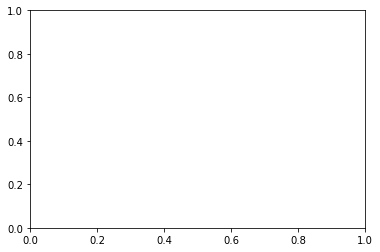

In [28]:
poly_y_pred = linear_regression.predict(poly_X)
#predictions = pd.DataFrame(poly_y_pred)

#print("Predictions: ", linear_regression.predict(poly_X.iloc[:4]))
#print("Actual: ", poly_X.iloc[:1])


In [30]:
print(y.shape)

(362,)


In [ ]:
# plot the points
plt.scatter(poly_X, y)

# plot the regression line
plt.plot(poly_X, poly_y_pred)
plt.show()

Comparing predictions for training set and test set values

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

mse = mean_squared_error(y_test, y_test_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=y_test_pred)

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n")

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

print("\n")

Defining the intercept of the polynomial line and coefficient values for x1, x2 ... xn.

In [ ]:
ridge_regression.intercept_
ridge_regression.coef_

Given:

y = a + b1x1 + b2x2 + b3x3 + b4x4

### Utilizing Regularization
In this particular instance I have chosen L2 regularization which will penalize the Loss (or cost) function by summing the coefficients and equalizing features which exhibit strong colinearity, while simultaneously reducing the effect of redundant coefficients. (See the colinearity matrix in the previous <a href="https://github.com/lynstanford/machine-learning-projects/machine-learning/multiple_regression.ipynb">Linear Regression</a> model).
    
Note, I have two hyperparameters I can adjust here including 'alpha' and 'normalize'. The 'alpha' value is the learning rate which controls the size of the incremental steps for the learning rate and the 'normalize' adjustment will re-scale the feature values between 0 and 1 for each observation in the dataset.

In [ ]:
from sklearn import linear_model

# initialize ridge regression
ridge_regression = linear_model.Ridge(alpha=0.1, normalize=True)

# fit the model to training set only!!!
ridge_regression.fit(X_train, y_train)

The regularization term should only be added to the cost function during the training phase. Now the 'training' data has been fit, it becomes important to discover the performance measure on the unregularized test set. Making a prediction on the first 5 values in the test set first.

In [ ]:
y_test_pred = ridge_regression.predict(X_test)
print("Predictions: ", ridge_regression.predict(X_test.iloc[:5]))

Defining the intercept of the polynomial line and coefficient values for x1, x2 ... xn.

In [ ]:
ridge_regression.intercept_
ridge_regression.coef_

Given:

    y = a + b1x1 + b2x2 + b3x3 + b4x4

This tells me the prediction for the target output variable, y, based on the input variables specified and using ridge regression giving the value of C$37,990.99.

## Model Validation Metrics¶
Now to measure the error score and accuracy of the line of fit.

## Applying Regularization
To avoid overfitting regularization can be applied, but will require tuning hyperparameters manually to an extent. To see if I can improve on the linear regression model's ability to predict the target variable, I have decided to use Ridge Regression.
This regularization term basically employs the use of a penalization method by summing the squared values of each coefficient (whether positive or negative) and helps balance the contribution of all the features but this term is only used during the training phase so I need to remove it for the purpose of testing and evaluation.

## Model Selection
### Ridge Regression
Trying a slightly different type of regression model using the alpha learning rate hyperparameter of 1.0 to see if I can reduce the (rmse) error value and increase the (r2) accuracy score. The purpose of using a ridge regression model is to try to reduce or eliminate the coefficient values of all the various features (especially those with high multi-colinearity between predictors) and will increase bias slightly but should decrease variance significantly. Ridge regression achieves this by assigning equal weights to those coefficient values which have high colinearity.

In [ ]:
# instantiate model
ridge_regression = linear_model.Ridge(alpha=1.0)

# fit model
ridge_regression.fit(X_train, y_train)

The regularization term should only be added to the cost function during the training phase. Now the 'training' data has been fit, it becomes important to discover the performance measure on the unregularized test set. Making a prediction on the first 5 values in the test set first.

In [ ]:
price_predictions = ridge_regression.predict(X_test)
print("Predictions: ", ridge_regression.predict(X_test.iloc[:5]))

This tells me the prediction for the target output variable, y, based on the input variables specified and using ridge regression giving the value of C$37,990.99.

## Model Validation Metrics¶
Now to measure the error score and accuracy of the line of fit.

This new data matrix containing the additional features with the squared values has been created by expanding the number of features and the parameter weights (or coefficients) which represent a quadratic equation. The linear regression model should now be applied again to this newly expanded dataframe containing the polynomial features.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, price_predictions)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=price_predictions)

In [ ]:
print("R-squared: ", ridge_regression.score(X_test, y_test))

Producing a scatter plot of the data points to display actual vs predicted prices and the regression line of best fit.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, price_predictions)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=price_predictions)

In [ ]:
print(ridge_regression.intercept_)
print(ridge_regression.coef_)

This is a slight improvement on the original R-squared score and I can see that the RMSE hasn't really changed.
Trying to improve on the scores above, I decided to introduce a Polynomial model which should be able to fit the line more accurately to the data points.

## Using a Pipeline
The next method involves placing the expanded polynomial features and linear regression of these within a pipeline which can be trained and used to predict the target variable.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
print(y_train_pred)

Next I wanted to find the shape of the matrices involved and now these datasets have been expanded by the polynomial model I want to make sure they have the same dimensions (m.n) otherwise the polynomial regression won't work.

In [ ]:
print(X_train.shape)

In [ ]:
print(y_train.shape)

In [ ]:
print(y_train_pred.shape)

In [ ]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# print the RMSE metric and R2 accuracy score
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The metrics from using the 2nd order quadratic coefficients and terms on the training set, a significant improvement.

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_test, y_test)
y_test_pred = pipeline.predict(X_test)
print(y_test_pred)

The metrics from generalizing to the test set data for the quadratic equation.

In [ ]:
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# print the RMSE metric and R2 accuracy score
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
print(y_train_pred)

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# print the RMSE metric and R2 accuracy score
print("\n")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

In [ ]:
print(X_test.shape)

In [ ]:
print(y_test.shape)

In [ ]:
print(y_test_pred.shape)

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_test, y_test)
y_test_pred = pipeline.predict(X_test)
print(y_test_pred)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# print the RMSE metric and R2 accuracy score
print("\n")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The metrics from using an equation with 3rd order cubic coefficients and terms on the test set produced the best overall scores so far.

# Model Validation
So the fit of the regression forecast line to the data has increased in its accuracy marginally with the degree of fit (or expansion of terms) and the RMSE has reduced fairly considerably. The R-squared accuracy appears to increase with smaller sets of data such as the test sets overall.

Ridge regression rmse score = 689.1925582115692
R-squared accuracy = 0.9991392014478754

So I can determine the use of ridge regression to regularize the model has produced a slight increase in overall variance but also a slight increase in bias of output prediction. Ridge regression should reduce the variance and if not, I probably need to adjust the 'degrees of freedom' hyperparameter for the cost function for the Polynomial model which feeds into it, or tune the 'alpha' hyperparameter in the actual ridge regression model itself. Tuning these inputs ...........

I have decided to see if I can improve the model's predictive power by electing to use a Decision Tree Regression model: "https://github.com/lynstanford/machine-learning-projects/tree/master/machine-learning/decision_tree.ipynb".

# Print dependencies
Dependencies are fundamental to record the **computational environment**.   

- Use [watermark](https://github.com/rasbt/watermark) to print version of python, ipython, and packages, and characteristics of the computer

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,watermark,tarfile,urllib3,matplotlib,seaborn,sklearn,pickle5

# date
print (" ")
%watermark -u -n -t -z 